<a href="https://colab.research.google.com/github/Rtniewi/kcwiertniewicz-IDS/blob/main/TechnicalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Katrina Cwiertniewicz
#####CSC 362
#####Submission Date : 2/26/2024
####**Assignment 4**
######Problem 1: Compare the behaviors of the Greedy Best-First and A* search algorithms.
######Problem 2: Compare the behaviors of the Greedy Best-First and A* search algorithms when using the Euclidean Distance and letting the agent make diagonal moves that are also made randomly.
######Problem 3: Compare the behaviors of the weighted A* Maze when:
f(n) = α.g(n) + β.h(n) where α,β ≥ 0. Explain how the different values of α and β affect the algorithm's behavior.



##Problem 1:
A* Maze uses the true cost and heuristic to create this path. Greedy Best-First uses only the heuristic to determine its path. Greedy Best-First Search is unaware of obstacles but aware of where the goal is. This is why the Greedy Best-First Maze is directed right toward the wall obstacle instead of down and around it, making this path more costly than the A* Maze.

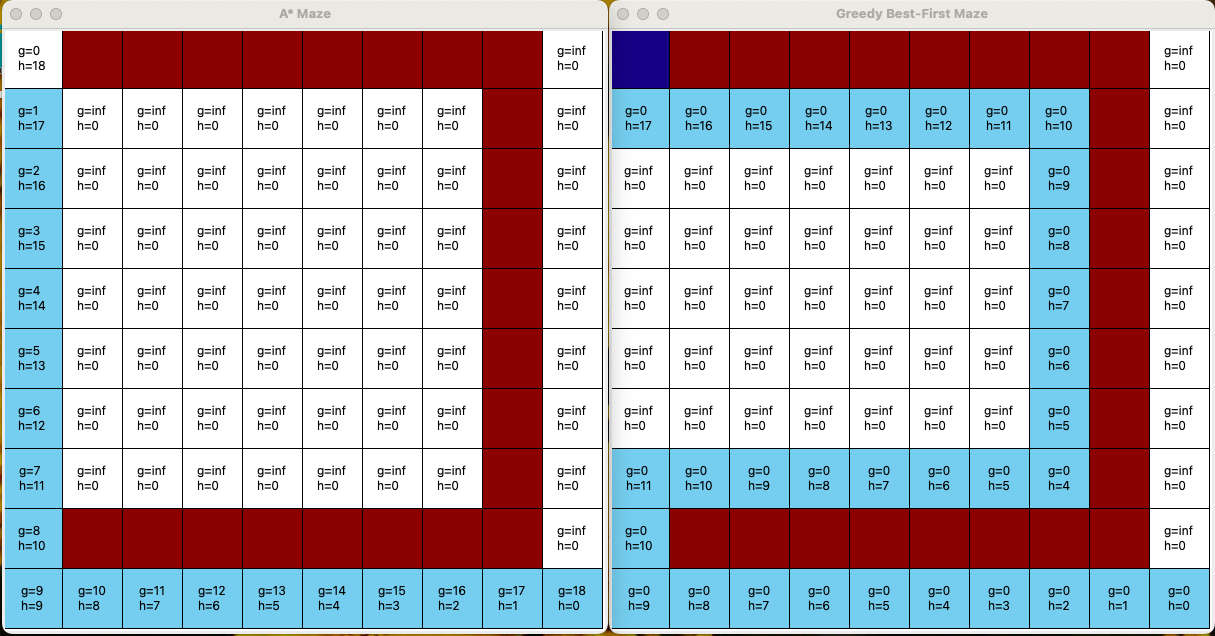

Code below is for A* Maze. This maze uses both the heuristic h(n) and true cost g(n) for its evaluation function.

In [ ]:
#### The cost of moving to a new position is 1 unit
  new_g = current_cell.g + 1

  if new_g < self.cells[new_pos[0]][new_pos[1]].g:
  ### Update the path cost g()
  self.cells[new_pos[0]][new_pos[1]].g = new_g

Code below is for the Greedy Best-First Maze. This maze only uses the heuristic h(n). This g(n) has no cost associated with its evaluation function.

In [ ]:
#### There is no cost of moving to next unit.
  new_g = current_cell.g

##Problem 2

A* Maze and Greedy Best-First Maze use the Euclidean Distance heuristic instead of the Manhattan Heuristic. The agent is allowed to make diagonal moves. The optimal path results are similar to problem 1. Greedy Best-First goes directly toward the goal without the addition of the true cost that A* uses for evaluation. A* Star begins in the direction of the goal towards the obstacle but turns away two steps earlier, saving path cost in comparison to Greedy Best-First Maze.

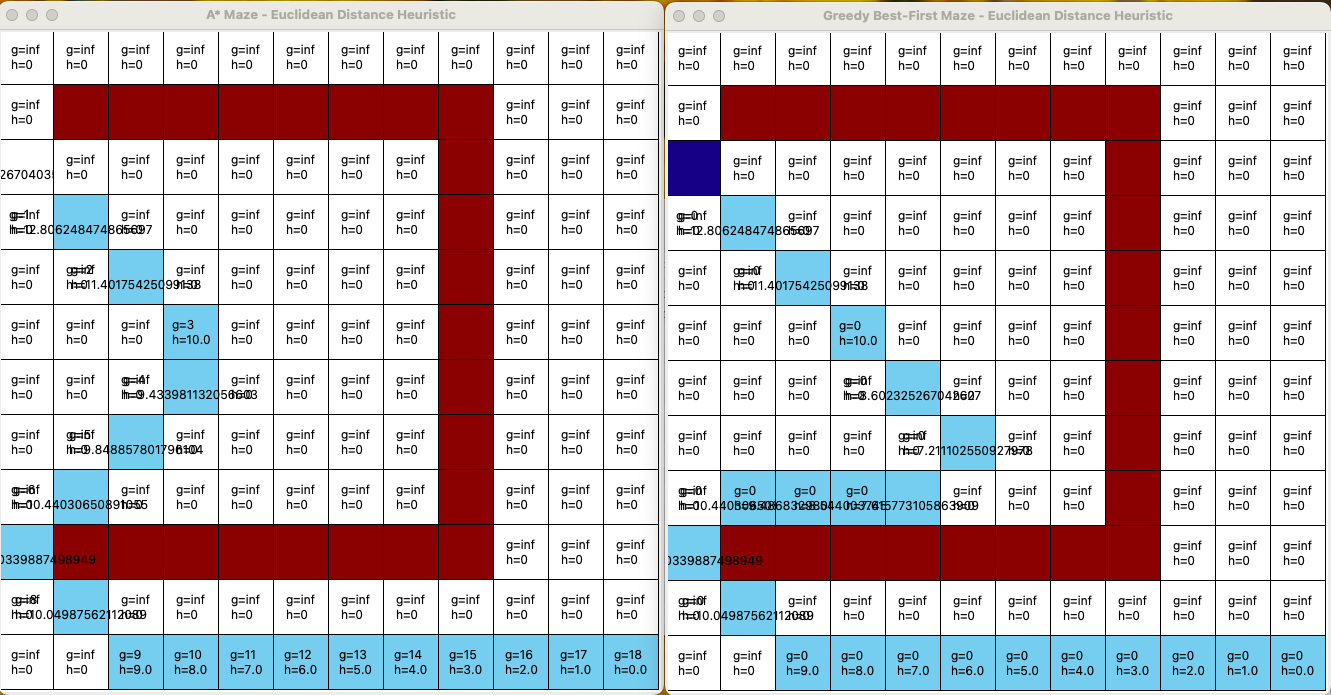

The agent is allowed to make diagonal moves so (1,1), (-1,1) , (1,-1) ,   (-1, -1) were added to make diagonal moves (NE, NW, SE, SW) respectively. Below is the code for the addition of these diagonal moves.

In [ ]:
#### Agent goes E, W, N, and S, whenever possible
#### Agent is allowed to make diagonal moves (i.e., NE, NW, SE, SW)
    for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]:
        new_pos = (current_pos[0] + dx, current_pos[1] + dy)

In Manhattan, the distance between two points is the sum of the absolute differences. The code below is from problem 1 to show the differences between Manhattan and Euclidean Distance heuristics.

In [ ]:
############################################################
#### Manhattan distance
############################################################
    def heuristic(self, pos):
        return (abs(pos[0] - self.goal_pos[0]) + abs(pos[1] - self.goal_pos[1]))



Manhattan Distance was changed to Euclidean Distance. The difference of the two points are squared and added together. That total is then square rooted. This finds the straight line distance, creating a diagonal line.

In [ ]:
############################################################
#### Euclidean Distance Heuristic
############################################################
    def heuristic(self, pos):
        return sqrt(((pos[0] - self.goal_pos[0])**2) + ((pos[1] - self.goal_pos[1])**2))

##Problem 3

f(n) = α.g(n) + β.h(n) where α,β ≥ 0.

Below is an example of a weighted evaluation function from variation 1.




In [ ]:
  ### Update the evaluation function for the cell n: f(n) = (5 * g(n)) + (0 * h(n))
  ### alpha = 5; beta = 0
        self.cells[new_pos[0]][new_pos[1]].f = (5 * new_g) + (0 * self.cells[new_pos[0]][new_pos[1]].h)
        self.cells[new_pos[0]][new_pos[1]].parent = current_cell

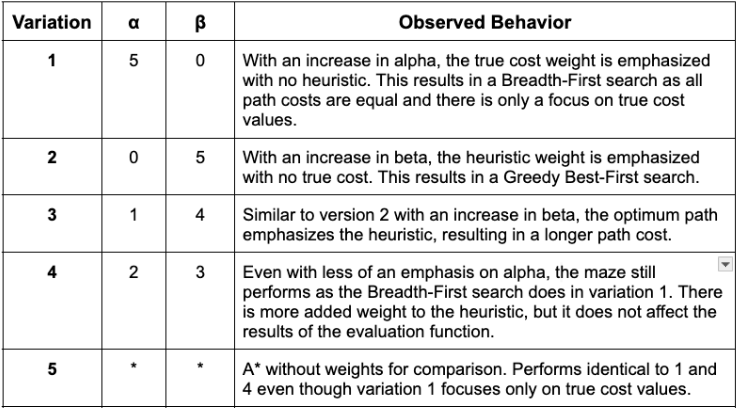

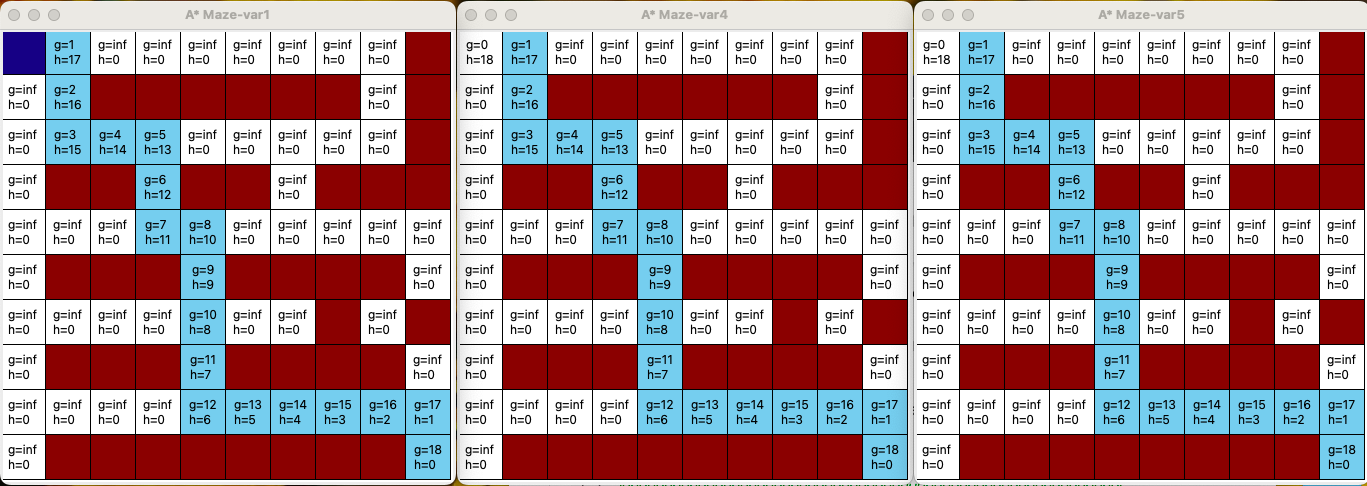

A* maze variation 5 is identical to 1 and 4 even though variation 5 has no weighted values. Each has different evaluation function weights but creates the same optimal path.

If path costs were not equal this would result in Dijkstra’s algorithm as long as all path costs are positive. Dijkstra's algorithm would be used to find an optimal path with the addition of factoring path cost. The results of 1 and 4 may then be varied from 5 if path cost and weighted values were included.

Below are the mazes for variations 2 and 3. These mazes are identical and both emphasize the heuristic function, resulting in a less optimal path at a cost of 26 in comparison to variations 1,4, and 5 with a path cost of 18


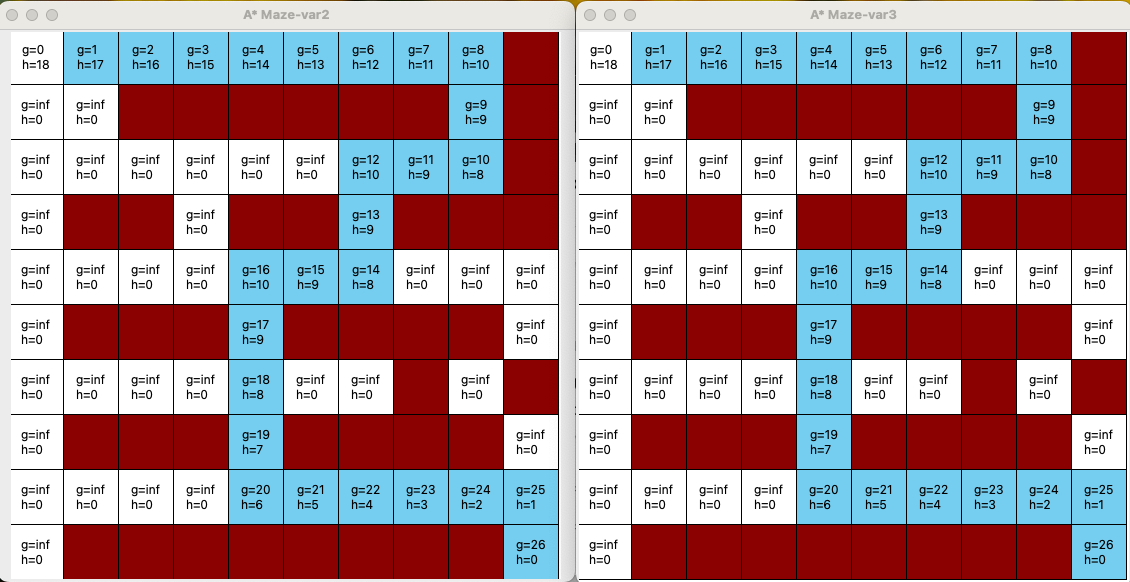

Below is the A* algorithm with increasing values of the bias, beta.
###From left to right the values are:
* Beta-var1: A* original(no change for beta)
* Beta-var2: beta = 1.5
* Beta-var3: beta = 2
* Beta-var4: beta = 50

As the bias increases towards states that are closer to the goal, the path becomes less optimal (increasing path cost from 18 to 20). For this maze, this difference in optimum path only occurs at the start of beta = 2 by doubling the heuristic. Due to the arbitrary choice of directing the path right, there are three paths down to choose from. From my experiments, the first path down is not chosen (g=3 down). Most likely, because it has the same cost as var1 and 2 so those paths continued right instead.

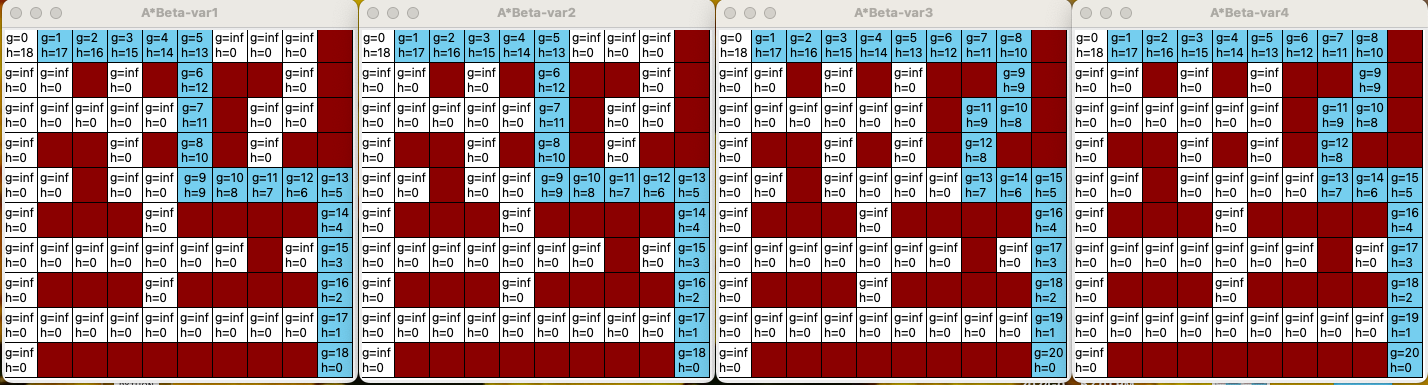

###Concluding Remarks
From these three problems the optimal path is the A* algorithm or when the A* is weighted with a focus on true cost. When using a Breadth-First search with only an emphasis on true cost, (var1 from problem 2) it performed identical to the A* algorithm.

For these experiments, I only evaluated smaller maze environments. The results may vary in a larger maze environment because of the addition of more path options. From my results for these problems, it is still possible to find the optimal path with only a true cost evaluation function. However, a good heuristic that goes towards the goal will create the optimal path in comparison to an evaluation that does use a combination of both true cost and a heuristic.